In [1]:
#Loading Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import pickle


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
##
from tensorflow.keras.utils import load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image


In [3]:
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image 
from tensorflow.keras import regularizers

In [4]:
import datetime
#from sklearn.metrics import plot_confusion_matrix

In [5]:
#Loading the data 
path = os.listdir(r"C:\Users\ASUS\Desktop\Digits" )

In [6]:
dataX = []     
datay = []  
print("Total number of Classes Detected :",len(path))
data_classes = len(path)

Total number of Classes Detected : 10


In [7]:
print("Importing the Classes......")
for i in range (0,data_classes):
    data_list = os.listdir(r"C:\Users\ASUS\Desktop\Digits"+"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"C:\Users\ASUS\Desktop\Digits" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        dataX.append(pic)
        datay.append(i)
    print(i,end=" ")

Importing the Classes......
0 1 2 3 4 5 6 7 8 9 

In [8]:
if len(dataX) == len(datay) :
    print("Total Data points= ",len(dataX))

Total Data points=  10113


In [9]:
# Labels and images
dataX = np.array(dataX)
datay = np.array(datay)
print(dataX.shape)
print(datay.shape)

(10113, 32, 32, 3)
(10113,)


In [15]:
#Spliting the train validation and test sets
x_train, x_test, y_train, y_test = train_test_split(dataX,datay,test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2)
print("Training Set Shape = ",x_train.shape)
print("Validation Set Shape = ",x_valid.shape)
print("Test Set Shape = ",x_test.shape)

Training Set Shape =  (6472, 32, 32, 3)
Validation Set Shape =  (1618, 32, 32, 3)
Test Set Shape =  (2023, 32, 32, 3)


[668, 629, 665, 647, 647, 628, 648, 617, 674, 649]


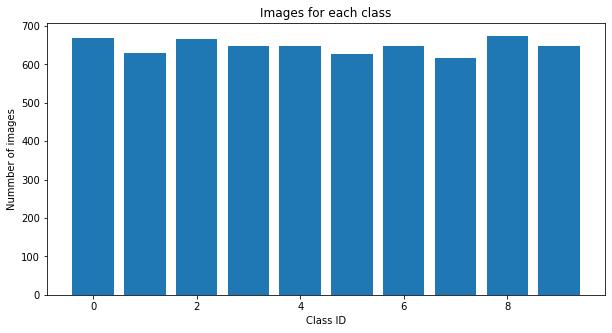

In [16]:
# Plotting Graph
noofsamples = []
for i in range(0,data_classes):
    noofsamples.append(len(np.where(y_train==i)[0]))
print(noofsamples)

plt.figure(figsize=(10,5))
plt.bar(range(0,data_classes),noofsamples)
plt.title("Images for each class")
plt.xlabel("Class ID")
plt.ylabel("Nummber of images")
plt.show()

In [17]:
#Preprocessing
def Preprocessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # making image grayscale
    img = cv2.equalizeHist(img) # Histogram equalization to enhance contrast
    img = img/255 # normalizing
    return img

In [18]:
# Checking the Preprocessed Image
img=Preprocessing(x_train[30])
img=cv2.resize(img,(300,300))
cv2.imshow("Pre-Processed Image",img)
cv2.waitKey(0)

-1

In [19]:
train_X = np.array(list(map(Preprocessing, x_train)))
test_X = np.array(list(map(Preprocessing, x_test)))
valid_X= np.array(list(map(Preprocessing, x_valid)))

In [20]:
#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

In [21]:
#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
datagen.fit(train_X)

In [23]:
# One hot encoding of the labels
y_train = to_categorical(y_train, data_classes)
y_test = to_categorical(y_test, data_classes)
y_valid = to_categorical(y_valid, data_classes)

In [27]:
### Our very simple model 
### A single convolution layer, followed by a dense layer followed by the output layer. 
### We're using linear regularisation and dropouts to prevent overfitting of the training data.

In [34]:
 #Creating a Neural Network
def mymodel():
    sizeoffilter1=(5,5)
    sizeoffilter2=(3,3)
    sizeofpool=(2,2)
    model = Sequential()

    model.add((Conv2D(60,sizeoffilter1,input_shape=(32, 32, 1) ,activation='relu')))
    model.add((Conv2D(60, sizeoffilter1,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeofpool))
    model.add((Conv2D(30, sizeoffilter2, activation='relu')))
    model.add((Conv2D(30, sizeoffilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeofpool, strides=sizeofpool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compiling the model
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model


In [35]:
model=mymodel()

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

In [41]:
#Fit the model

history = model.fit(datagen.flow(train_X, y_train, batch_size=32),
                              epochs = 15, validation_data = (valid_X, y_valid),
                              verbose = 2, steps_per_epoch = 200,shuffle = 1)

Epoch 1/15
200/200 - 26s - loss: 0.2550 - accuracy: 0.9191 - val_loss: 0.0491 - val_accuracy: 0.9858 - 26s/epoch - 132ms/step
Epoch 2/15
200/200 - 27s - loss: 0.1969 - accuracy: 0.9377 - val_loss: 0.0474 - val_accuracy: 0.9845 - 27s/epoch - 133ms/step
Epoch 3/15
200/200 - 27s - loss: 0.1674 - accuracy: 0.9493 - val_loss: 0.0311 - val_accuracy: 0.9889 - 27s/epoch - 133ms/step
Epoch 4/15
200/200 - 26s - loss: 0.1331 - accuracy: 0.9588 - val_loss: 0.0350 - val_accuracy: 0.9870 - 26s/epoch - 132ms/step
Epoch 5/15
200/200 - 26s - loss: 0.1347 - accuracy: 0.9569 - val_loss: 0.0510 - val_accuracy: 0.9808 - 26s/epoch - 132ms/step
Epoch 6/15
200/200 - 27s - loss: 0.1391 - accuracy: 0.9581 - val_loss: 0.0266 - val_accuracy: 0.9913 - 27s/epoch - 134ms/step
Epoch 7/15
200/200 - 27s - loss: 0.1183 - accuracy: 0.9627 - val_loss: 0.0256 - val_accuracy: 0.9926 - 27s/epoch - 133ms/step
Epoch 8/15
200/200 - 26s - loss: 0.1009 - accuracy: 0.9683 - val_loss: 0.0319 - val_accuracy: 0.9889 - 26s/epoch - 132

Test Score = 0.019078535959124565
Test Accuracy = 0.9955511689186096


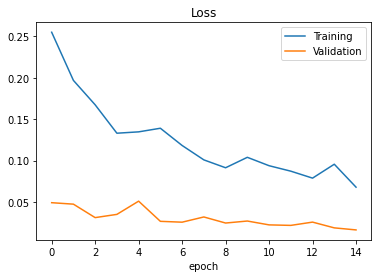

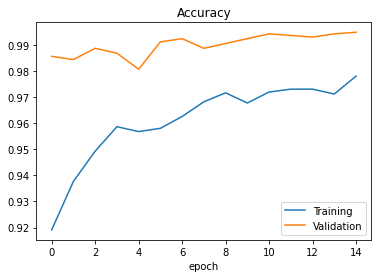

In [50]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Loss")
plt.xlabel("epoch")

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

score = model.evaluate(test_X, y_test,verbose=0)
print("Test Score =",score[0])
print("Test Accuracy =",score[1])

In [51]:
model.save('gfModel.h5')
print('Model Saved!')

Model Saved!


In [52]:
savedModel=load_model('gfModel.h5')
savedModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

In [55]:
pickle.dump(test_X, open('xtest', 'wb')) 

In [56]:
pickle.dump(y_test, open('ytest', 'wb')) 